In [1]:
from tensorflow.keras.layers import LSTM, Input, SimpleRNN, GRU, Dense,Flatten,GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [4]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [5]:
series=df['close'].values.reshape(-1,1)

In [6]:
scaler=StandardScaler()
scaler.fit(series[:len(series)//2])
series=scaler.transform(series).flatten()

In [7]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print(X.shape,Y.shape)

(1249, 10, 1) (1249,)


In [8]:
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
)
r=model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:]),
)

Epoch 1/80
20/20 [==============================] - 7s 28ms/step - loss: 0.1631 - val_loss: 0.0661
Epoch 2/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0124 - val_loss: 0.0415
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0071 - val_loss: 0.0187
Epoch 4/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0067 - val_loss: 0.0159
Epoch 5/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0085 - val_loss: 0.0205
Epoch 6/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0060 - val_loss: 0.0178
Epoch 7/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0068 - val_loss: 0.0148
Epoch 8/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0067 - val_loss: 0.0506
Epoch 9/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.0132
Epoch 10/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0058 - val_loss: 0.0170
Epoch 11/80
20/20 

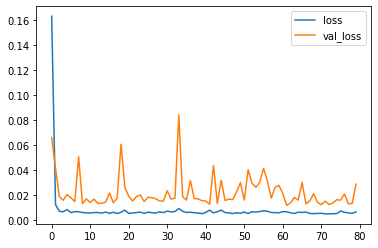

In [9]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')#validation data loss
plt.legend()

40/40 [==============================] - 1s 3ms/step
(1249, 1)


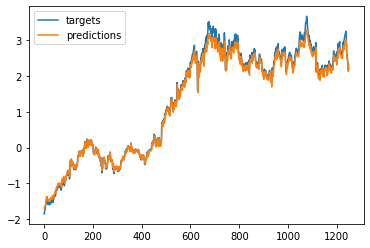

In [10]:
# one step predictions
outputs=model.predict(X)
print(outputs.shape)
prediction=outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(prediction,label='predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


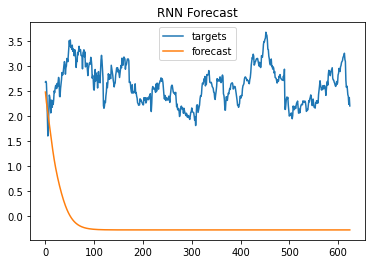

In [11]:
# multi step forecast
forecast=[]
input=X[-N//2]
while (len(forecast)<len(Y[-N//2:])):
  f=model.predict(input.reshape(1,T,1))[0,0]
  forecast.append(f)
  input=np.roll(input,-1)
  input[-1]=f
plt.plot(Y[-N//2:],label='targets')
plt.plot(forecast,label='forecast')
plt.title('RNN Forecast')
plt.legend()
plt.show()

In [12]:
df['PrevClose']=df['close'].shift(1)

In [13]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [14]:
df['return']=(df['close']-df['PrevClose'])/df['PrevClose']

In [15]:
df.head(  )

,date,open,high,low,close,volume,Name,PrevClose,return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


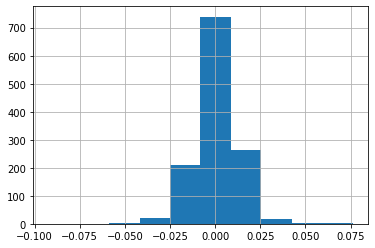

In [16]:
df['return'].hist()

In [17]:
series=df['return'].values[1:].reshape(-1,1)
sclaer=StandardScaler()
scaler.fit(series[:len(series)//2])
series=scaler.transform(series).flatten()

In [18]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print(X.shape,Y.shape)

(1248, 10, 1) (1248,)


In [19]:
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
)
r=model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:]),
)

Epoch 1/80
20/20 [==============================] - 4s 57ms/step - loss: 1.0101 - val_loss: 1.1828
Epoch 2/80
20/20 [==============================] - 0s 15ms/step - loss: 1.0102 - val_loss: 1.1338
Epoch 3/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9913 - val_loss: 1.1431
Epoch 4/80
20/20 [==============================] - 0s 13ms/step - loss: 0.9863 - val_loss: 1.1821
Epoch 5/80
20/20 [==============================] - 0s 19ms/step - loss: 0.9984 - val_loss: 1.1345
Epoch 6/80
20/20 [==============================] - 0s 15ms/step - loss: 0.9896 - val_loss: 1.1977
Epoch 7/80
20/20 [==============================] - 0s 16ms/step - loss: 0.9912 - val_loss: 1.1963
Epoch 8/80
20/20 [==============================] - 0s 14ms/step - loss: 0.9940 - val_loss: 1.1393
Epoch 9/80
20/20 [==============================] - 0s 15ms/step - loss: 0.9803 - val_loss: 1.1959
Epoch 10/80
20/20 [==============================] - 0s 16ms/step - loss: 0.9794 - val_loss: 1.1828
Epoch 11/

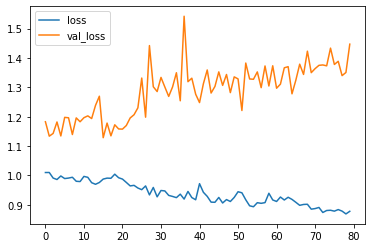

In [20]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')#validation data loss
plt.legend()

39/39 [==============================] - 1s 3ms/step
(1248, 1)


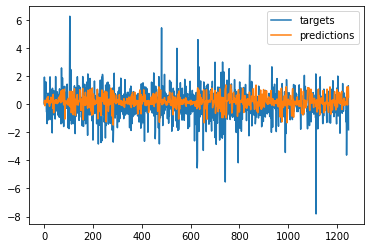

In [21]:
# one step predictions
outputs=model.predict(X)
print(outputs.shape)
prediction=outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(prediction,label='predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 16ms/step


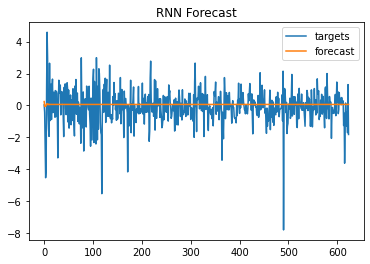

In [22]:
# multi step forecast
forecast=[]
input=X[-N//2]
while (len(forecast)<len(Y[-N//2:])):
  f=model.predict(input.reshape(1,T,1))[0,0]
  forecast.append(f)
  input=np.roll(input,-1)
  input[-1]=f
plt.plot(Y[-N//2:],label='targets')
plt.plot(forecast,label='forecast')
plt.title('RNN Forecast')
plt.legend()
plt.show()

In [23]:
inputdata=df[['open','high','low','close','volume']].values
targets=df['return'].values

In [24]:
T=10
D=inputdata.shape[1]
N=len(inputdata)-T

In [25]:
Ntrain=len(inputdata)*2//3
scaler=StandardScaler()
scaler.fit(inputdata[:Ntrain+T])
inputdata=scaler.transform(inputdata)

In [26]:
X_train=np.zeros((Ntrain,T,D))
Y_train=np.zeros(Ntrain)
for t in range(Ntrain):
  X_train[t,:,:]=inputdata[t:t+T]
  Y_train[t]=(targets[t+T]>0)

In [27]:
X_test=np.zeros((N-Ntrain,T,D))
Y_test=np.zeros(N-Ntrain)
for u in range(N-Ntrain):
  t=u+Ntrain
  X_train[u ,:,:]=inputdata[t:t+T]
  Y_train[u]=(targets[t+T]>0)

In [28]:
i=Input(shape=(T,D))
x=LSTM(50)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)
r=model.fit(
    X_train,Y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_test,Y_test),
)

Epoch 1/300
27/27 [==============================] - 2s 21ms/step - loss: 0.6993 - accuracy: 0.5101 - val_loss: 0.7985 - val_accuracy: 0.0000e+00
Epoch 2/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6889 - accuracy: 0.5375 - val_loss: 0.8399 - val_accuracy: 0.0000e+00
Epoch 3/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5328 - val_loss: 0.8139 - val_accuracy: 0.0000e+00
Epoch 4/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6881 - accuracy: 0.5435 - val_loss: 0.8194 - val_accuracy: 0.0000e+00
Epoch 5/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6882 - accuracy: 0.5149 - val_loss: 0.8350 - val_accuracy: 0.0000e+00
Epoch 6/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6861 - accuracy: 0.5626 - val_loss: 0.8336 - val_accuracy: 0.0000e+00
Epoch 7/300
27/27 [==============================] - 0s 10ms/step - loss: 0.6811 - accuracy: 0.5614 - val_loss: 0.8516 - val_acc

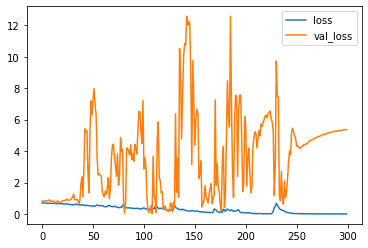

In [29]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')#validation data loss
plt.legend()

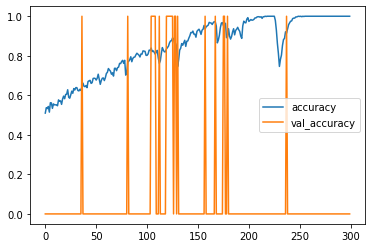

In [30]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')#validation data accuracy
plt.legend()